In [12]:
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [29]:
file_path = '/content/drive/MyDrive/Python/test 220103/export_sample.xml'
# file_path = '/content/drive/MyDrive/Python/test 220103/export_cda.xml'

In [30]:
df = pd.DataFrame([], columns=['date', 'bpm'])
pattern = '^.*IdentifierHeartRate".*startDate="(.{19}).*value="([0-9]*).*$'

with open(file_path, 'r') as f:
    for line in f:
        search = re.search(pattern, line)
        if search is not None:
            
            df = df.append({'date': search.group(1),'bpm': search.group(2)}, ignore_index=True)

df.date = pd.to_datetime(df.date)
df.bpm = pd.to_numeric(df.bpm)

df = df.set_index('date')
df = df.sort_index()

df.head()

,bpm
date,
2021-11-03 15:08:00,67
2021-11-03 15:09:46,72
2021-11-03 15:14:18,68
2021-11-03 15:14:50,64
2021-11-03 15:23:02,68


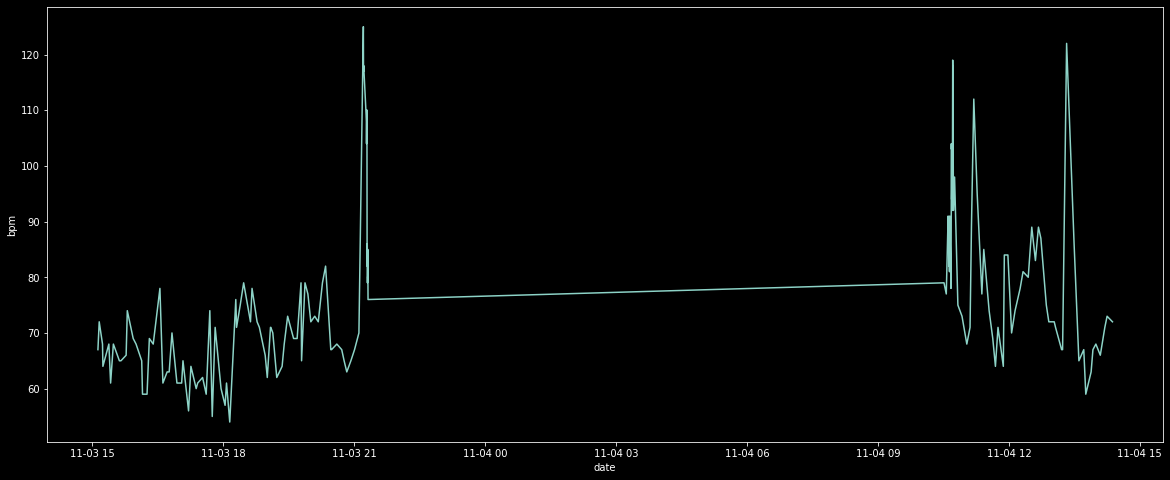

In [31]:
plt.figure(figsize=(20, 8))
sns.lineplot(x=df.index, y=df.bpm)
plt.show()

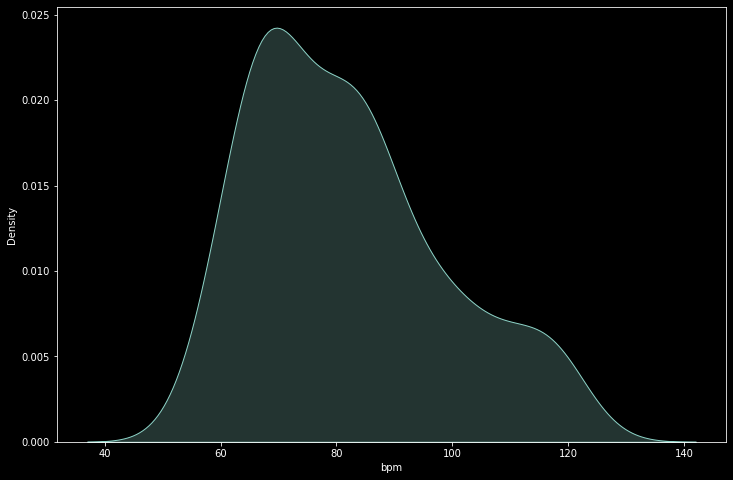

In [32]:
plt.figure(figsize=(12, 8))
sns.kdeplot(x=df.bpm, fill=True)
plt.show()

In [38]:
df_211103 = df.loc['2021-11-03']

df_211103

,bpm
date,
2021-11-03 15:08:00,67
2021-11-03 15:09:46,72
2021-11-03 15:14:18,68
2021-11-03 15:14:50,64
2021-11-03 15:23:02,68
...,...
2021-11-03 21:18:58,81
2021-11-03 21:19:00,81
2021-11-03 21:19:04,81


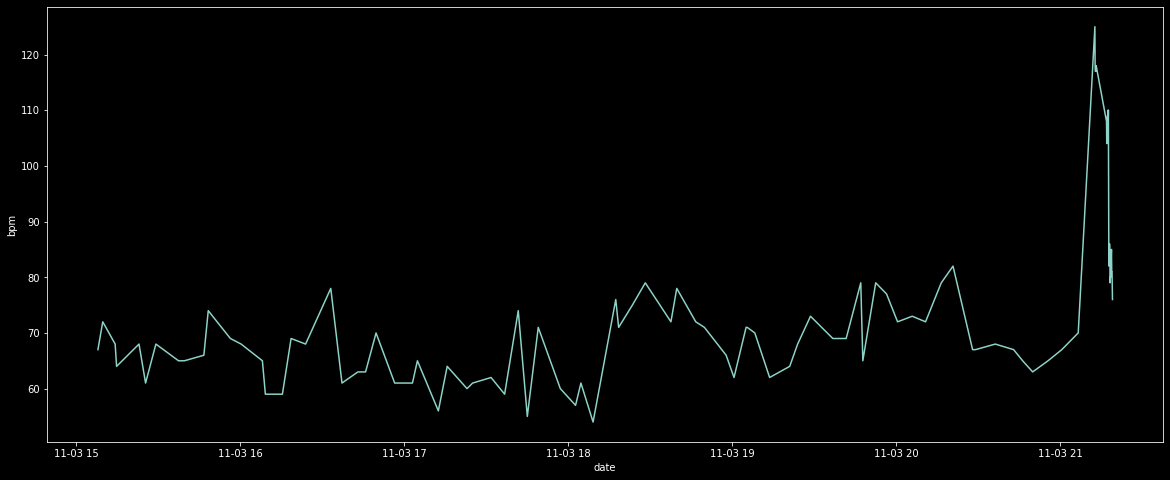

In [40]:
plt.figure(figsize=(20, 8)) 
sns.lineplot(x=df_211103.index, y=df_211103.bpm)
plt.show()

In [42]:
notes = [{
        'time': '2021-11-03 12:45:00',
        'note': 'Kiss'
    }, {
        'time': '2021-11-03 17:00:00',
        'note': 'Coding'
    }, {
        'time': '2021-11-03 18:10:00',
        'note': 'Dinner'
}]

In [44]:
dt = pd.to_datetime('2021-11-03 12:45:00')

df_211103.index.get_loc(dt, method='nearest')

0

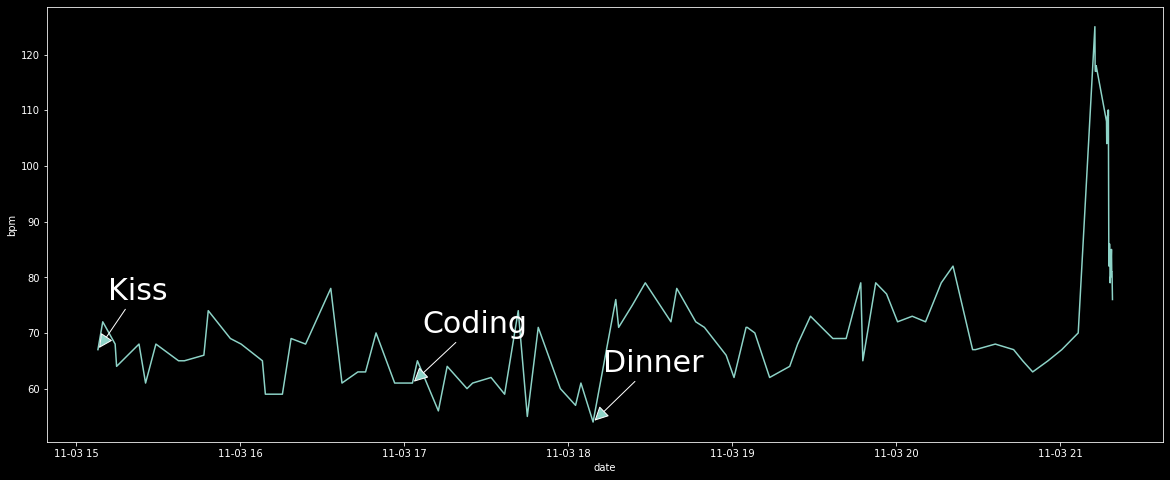

In [47]:
plt.figure(figsize=(20, 8)) 
sns.lineplot(x=df_211103.index, y=df_211103.bpm)

for note in notes:
    dt = pd.to_datetime(note['time'])
    idx = df_211103.index.get_loc(dt, method='nearest')

    plt.annotate(
        note['note'],
        (df_211103.iloc[idx].name, df_211103.iloc[idx].bpm),
        xytext=(10, 50), 
        textcoords='offset points',
        arrowprops=dict(arrowstyle='-|>'),
        fontsize=30
    )

plt.show()